In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
df = pd.read_csv('data/cleaned_data_for_modeling.csv')

# Identify time-related columns to exclude
time_cols = ['datetime', 'time_day_sin', 'time_day_cos', 'day_of_year']
cols_for_correlation = [c for c in df.columns if c not in time_cols]

df_numeric = df[cols_for_correlation]

In [2]:
# Correlation matrix (Pearson)
corr_matrix = df_numeric.corr()
corr_matrix

,humidity,temperature,irradiance,irradiance_site,temperature_site,humidity_site,power_eu_3,power_lag1
humidity,1.000000,-0.554241,-0.631038,-0.509826,-0.566310,0.964334,-0.468381,-0.536577
temperature,-0.554241,1.000000,0.561089,0.443314,0.923306,-0.424858,0.376126,0.424788
irradiance,-0.631038,0.561089,1.000000,0.872833,0.687920,-0.490834,0.749955,0.746168
irradiance_site,-0.509826,0.443314,0.872833,1.000000,0.617036,-0.369646,0.825460,0.738783
temperature_site,-0.566310,0.923306,0.687920,0.617036,1.000000,-0.415658,0.634499,0.665223
humidity_site,0.964334,-0.424858,-0.490834,-0.369646,-0.415658,1.000000,-0.362167,-0.423600
power_eu_3,-0.468381,0.376126,0.749955,0.825460,0.634499,-0.362167,1.000000,0.885101
power_lag1,-0.536577,0.424788,0.746168,0.738783,0.665223,-0.423600,0.885101,1.000000


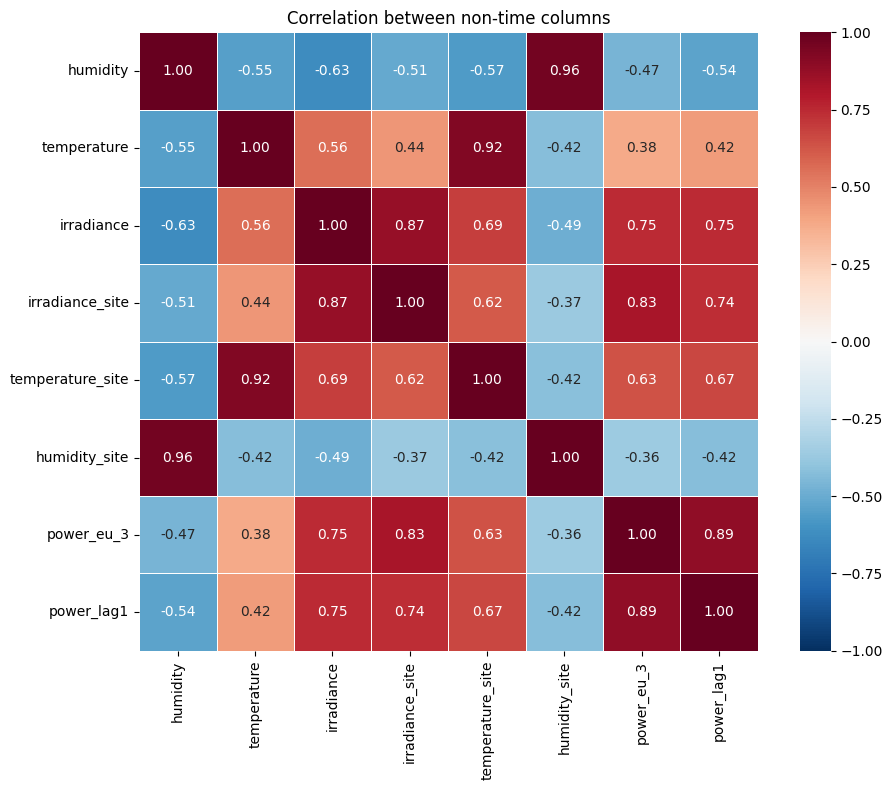

In [3]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f', 
            square=True, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation between non-time columns')
plt.tight_layout()
plt.show()

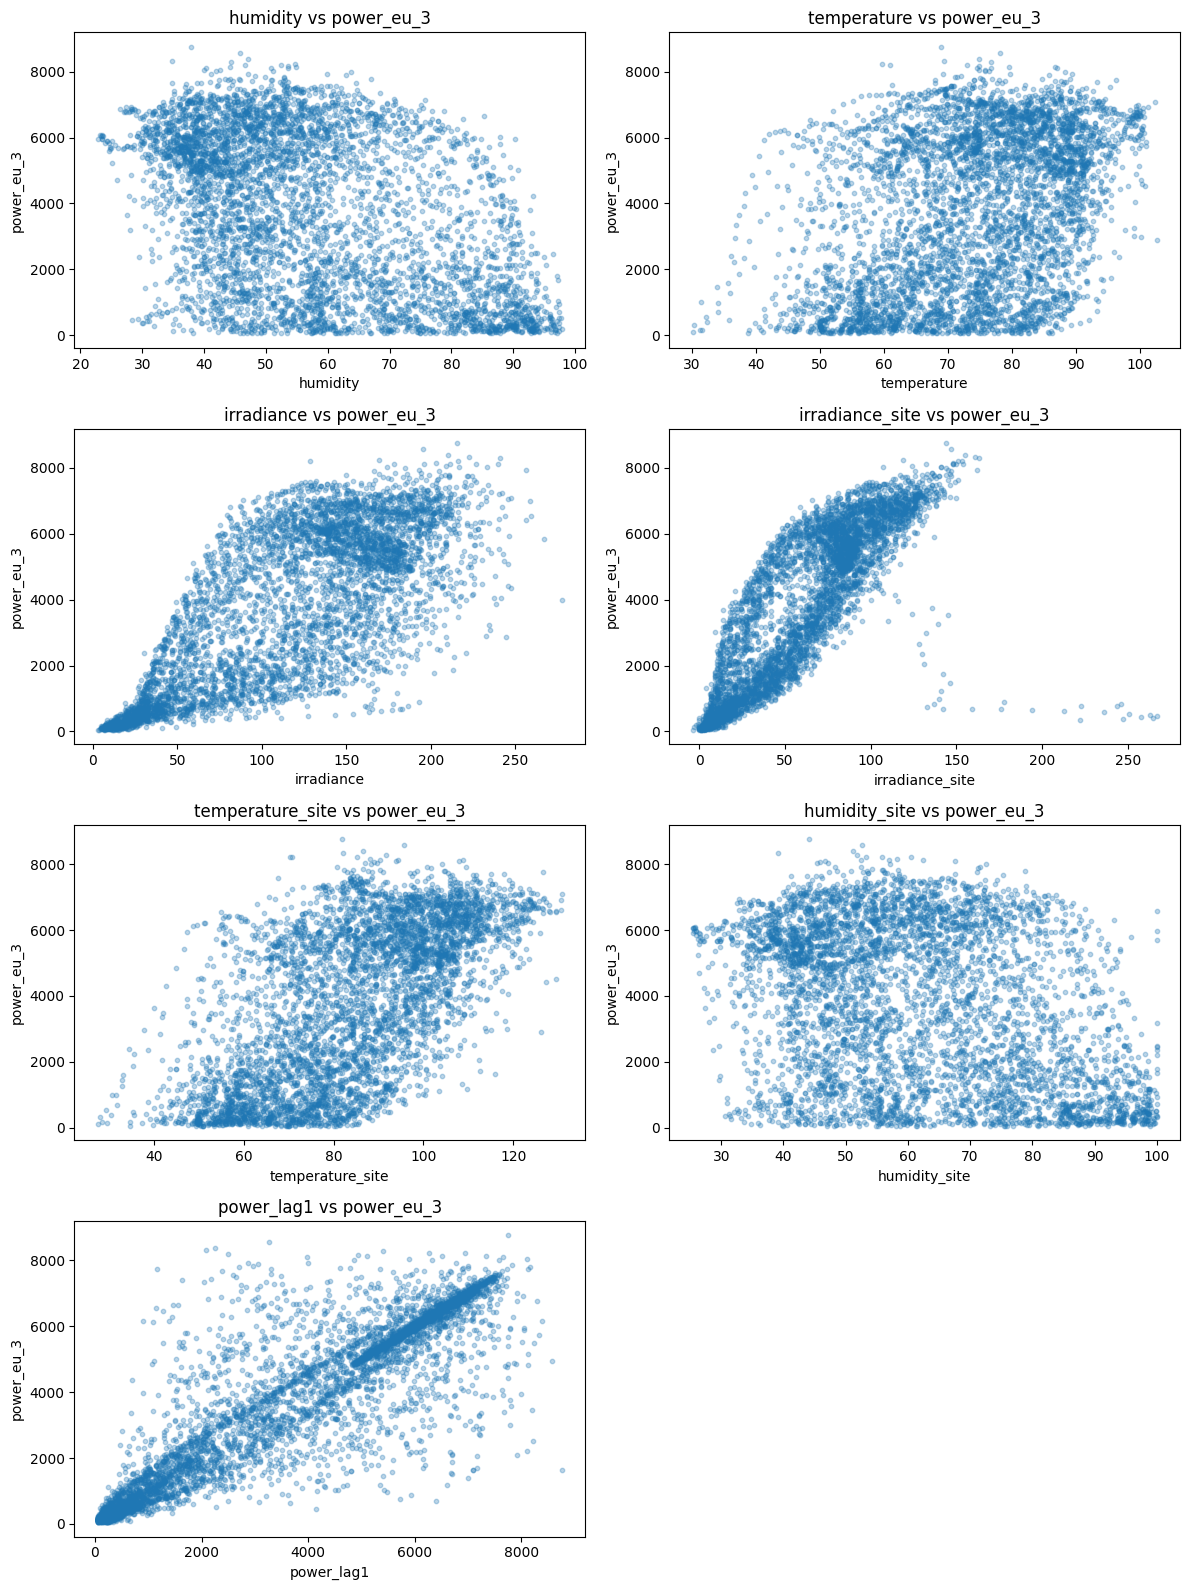

In [5]:
# Plot each feature vs power_eu_3
feature_cols = [c for c in df_numeric.columns if c != 'power_eu_3']
n_features = len(feature_cols)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = np.atleast_1d(axes).flatten()

for i, col in enumerate(feature_cols):
    axes[i].scatter(df_numeric[col], df_numeric['power_eu_3'], alpha=0.3, s=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('power_eu_3')
    axes[i].set_title(f'{col} vs power_eu_3')

# Hide unused subplot if any
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [4]:
# Correlation with power_eu_3 (target) - sorted by absolute value
if 'power_eu_3' in df_numeric.columns:
    power_corr = df_numeric.corr()['power_eu_3'].drop('power_eu_3', errors='ignore').sort_values(key=abs, ascending=False)
    print("Correlation with power_eu_3:")
    print(power_corr)

Correlation with power_eu_3:
power_lag1          0.885101
irradiance_site     0.825460
irradiance          0.749955
temperature_site    0.634499
humidity           -0.468381
temperature         0.376126
humidity_site      -0.362167
Name: power_eu_3, dtype: float64
